## Fashion Mnist 

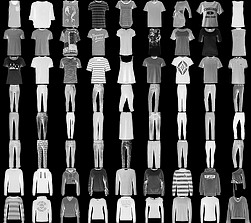

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, log_loss
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification

import warnings
warnings.filterwarnings("ignore")

In [15]:
df_train = pd.read_csv(r"C:\Users\Ofir\Desktop\קבצים ךפרוייקט\fashion-mnist_train.csv")
df_test = pd.read_csv(r"C:\Users\Ofir\Desktop\קבצים ךפרוייקט\fashion-mnist_test.csv")
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
train_labels = np.array(df_train.label)
test_labels = np.array(df_test.label)

In [17]:
df_train.drop('label',axis=1, inplace=True)
df_test.drop('label',axis=1, inplace=True)

In [18]:
label_name = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
train_data = np.array(df_train).reshape(df_train.shape[0],28,28,1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df_train, train_labels, test_size=0.3)

### Visualization

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

KeyError: 0

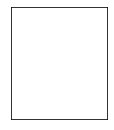

In [21]:
plt.figure(figsize=(10,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(Names[y_train[i]])
plt.show()

## Models 

### Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier


clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8787777777777778


In [13]:
test_pred = clf.predict(df_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(test_labels, test_pred))

Accuracy: 0.8805


### Hard voting

In [9]:
LogReg_clf = LogisticRegression()
DTree_clf = DecisionTreeClassifier()
SVC_clf = SVC()
voting_clf = VotingClassifier(estimators=[('SVC', SVC_clf), ('DTree', DTree_clf), ('LogReg', LogReg_clf)], voting='hard')
voting_clf.fit(X_train, y_train)
preds = voting_clf.predict(X_val)

acc = accuracy_score(y_val, preds)

print("Accuracy is: " + str(acc))


Accuracy is: 0.8788333333333334


### Bagging 

In [24]:
bag_clf = BaggingClassifier(
 DecisionTreeClassifier(), n_estimators=500,
 max_samples=100, bootstrap=True, n_jobs=-1)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_val)

accuracy_score(y_val, y_pred)

0.7725

### Adaboodt 

In [25]:
from sklearn.model_selection import RepeatedStratifiedKFold

df_train, train_labels = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)

model = AdaBoostClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train,y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.518 (0.045)


In [33]:
from sklearn.tree import DecisionTreeClassifier

dtclf = DecisionTreeClassifier(max_depth=1, criterion='gini',
                               random_state=1)
dtclf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

dtclf_train_sc = accuracy_score(y_train, dtclf.predict(X_train))
dtclf_test_sc = accuracy_score(y_val, dtclf.predict(X_val))
print('Decision tree train/test accuracies %.3f/%.3f' % (dtclf_train_sc, dtclf_test_sc))

Decision tree train/test accuracies 0.199/0.189


In [35]:
from sklearn.ensemble import AdaBoostClassifier

adaclf = AdaBoostClassifier(base_estimator=dtclf,
                            n_estimators=50,
                            learning_rate=0.5,
                            algorithm='SAMME.R',
                            random_state=1)

adaclf.fit(X_train, y_train)

adaclf_train_sc = accuracy_score(y_train, adaclf.predict(X_train))
adaclf_test_sc = accuracy_score(y_val, adaclf.predict(X_val))
print('AdaBoost train/test accuracies %.3f/%.3f' % (adaclf_train_sc, adaclf_test_sc))

AdaBoost train/test accuracies 0.587/0.583
